# Causal Inference Notebook

In [1]:
import pandas as pd 
import os, sys
from sklearn.preprocessing import Normalizer
import warnings 
warnings.filterwarnings("ignore") 

sys.path.append(os.path.abspath(os.path.join('../scripts')))
from data_pipeline import fetch_clean_data


## Prepare the data

### Preview

In [13]:
df = fetch_clean_data()

In [14]:
df.columns

Index(['id', 'order_id', 'driver_id', 'lat', 'lng', 'trip_start_time',
       'trip_end_time', 'origin_lat', 'origin_lon', 'dest_lat', 'dest_lon',
       'distance', 'year', 'month', 'isWeekDay', 'hour', 'duration',
       'isHoliday', 'speed', 'driver_proximity', 'fulfilled'],
      dtype='object')

In [15]:
df.describe()

,id,order_id,driver_id,lat,lng,origin_lat,origin_lon,dest_lat,dest_lon,distance,year,month,isWeekDay,hour,duration,isHoliday,speed,driver_proximity,fulfilled
count,2.587100e+04,25871.000000,25871.000000,25871.000000,25871.000000,25871.000000,25871.000000,25871.000000,25871.000000,25871.000000,25871.000000,25871.000000,25871.000000,25871.000000,25871.000000,25871.000000,25871.000000,25871.000000,25871.000000
mean,8.037295e+05,420032.315025,236950.182869,6.528154,3.389208,6.528024,3.389423,6.522929,3.401055,11536.180757,2021.000116,6.999536,0.855591,13.229717,3772.363109,0.144409,13.412700,1593.513835,0.963434
std,5.060676e+05,16506.709366,19629.496290,0.071303,0.080260,0.079433,0.081154,0.102009,0.098738,12136.372978,0.010768,0.060277,0.351511,3.102313,7115.513966,0.351511,80.391011,4647.080656,0.187697
min,1.000000e+00,392001.000000,121981.000000,6.415885,3.076561,1.000000,1.000000,1.000000,1.000000,16.471055,2021.000000,1.000000,0.000000,0.000000,16.000000,0.000000,0.005076,0.000000,0.000000
25%,3.681465e+05,405690.500000,243203.000000,6.453507,3.343523,6.455103,3.345503,6.449389,3.346477,5369.247981,2021.000000,7.000000,1.000000,11.000000,1668.000000,0.000000,1.999265,821.627089,1.000000
50%,7.268880e+05,420379.000000,243679.000000,6.527532,3.369349,6.527243,3.371989,6.514889,3.379300,9816.814170,2021.000000,7.000000,1.000000,13.000000,2776.000000,0.000000,3.226599,1414.880117,1.000000
75%,1.335426e+06,434017.500000,244147.000000,6.594942,3.427251,6.594339,3.423915,6.593874,3.460672,15841.895164,2021.000000,7.000000,1.000000,16.000000,4243.000000,0.000000,5.123073,1934.607405,1.000000
max,1.557678e+06,517948.000000,247877.000000,7.702536,8.515414,8.226835,8.522293,7.703160,8.607887,682878.368122,2022.000000,9.000000,1.000000,23.000000,326248.000000,1.000000,5153.210716,659052.705726,1.000000


In [16]:
df.min()

id                                    1
order_id                         392001
driver_id                        121981
lat                            6.415885
lng                            3.076561
trip_start_time     2021-07-01 06:39:51
trip_end_time       2021-07-01 07:25:03
origin_lat                          1.0
origin_lon                          1.0
dest_lat                            1.0
dest_lon                            1.0
distance                      16.471055
year                               2021
month                                 1
isWeekDay                             0
hour                                  0
duration                           16.0
isHoliday                             0
speed                          0.005076
driver_proximity                    0.0
fulfilled                             0
dtype: object

In [17]:
df.max()

id                              1557678
order_id                         517948
driver_id                        247877
lat                            7.702536
lng                            8.515414
trip_start_time     2022-02-27 09:07:59
trip_end_time       2022-02-27 09:17:41
origin_lat                     8.226835
origin_lon                     8.522293
dest_lat                        7.70316
dest_lon                       8.607887
distance                  682878.368122
year                               2022
month                                 9
isWeekDay                             1
hour                                 23
duration                       326248.0
isHoliday                             1
speed                       5153.210716
driver_proximity          659052.705726
fulfilled                             1
dtype: object

In [22]:
df.year.value_counts()

2021    25868
2022        3
Name: year, dtype: int64

In [21]:
# df.to_csv('../data/final_processed.csv',index = False)
# df = pd.read_csv('../data/final_processed.csv')

### Drop Unwanted columns

In [23]:
unwanted_cols = ['id','order_id','driver_id','lat','lng','trip_start_time',
                 'trip_end_time','origin_lat','origin_lon','dest_lat','dest_lon','year','month','hour']
df_causal = df.drop(columns=unwanted_cols)

In [24]:
df_causal

,distance,isWeekDay,duration,isHoliday,speed,driver_proximity,fulfilled
0,21048.291786,1,217.0,0,96.996736,693.616345,1
1,8160.545042,1,2055.0,0,3.971068,1968.052120,1
2,5067.848407,1,3681.0,0,1.376759,2954.031519,1
3,5603.770382,1,2102.0,0,2.665923,1197.387881,1
4,19081.836553,1,2657.0,0,7.181722,197.983625,1
...,...,...,...,...,...,...,...
25866,2579.543899,1,2539.0,0,1.015968,1631.673193,1
25867,3605.326343,0,582.0,1,6.194719,2733.372507,1
25868,26721.690112,0,2861.0,1,9.339983,3098.207951,1
25869,18422.164135,1,4012.0,0,4.591766,1847.634112,1


### Normalise Data

In [25]:
def normalizer(df,columns) -> pd.DataFrame:
    """
    Returns dataframe with normalized columns
    """
    nrm = Normalizer()
    df_norm = df.copy(deep=True)
    df_norm[columns] = pd.DataFrame(
        nrm.fit_transform( df_norm[columns]), columns=columns
    )
    return df_norm
    # return df

In [26]:
df_causal_norm = normalizer(df_causal,columns=['distance','duration','speed','driver_proximity'])

In [27]:
df_causal

,distance,isWeekDay,duration,isHoliday,speed,driver_proximity,fulfilled
0,21048.291786,1,217.0,0,96.996736,693.616345,1
1,8160.545042,1,2055.0,0,3.971068,1968.052120,1
2,5067.848407,1,3681.0,0,1.376759,2954.031519,1
3,5603.770382,1,2102.0,0,2.665923,1197.387881,1
4,19081.836553,1,2657.0,0,7.181722,197.983625,1
...,...,...,...,...,...,...,...
25866,2579.543899,1,2539.0,0,1.015968,1631.673193,1
25867,3605.326343,0,582.0,1,6.194719,2733.372507,1
25868,26721.690112,0,2861.0,1,9.339983,3098.207951,1
25869,18422.164135,1,4012.0,0,4.591766,1847.634112,1


In [28]:
df_causal_norm

,distance,isWeekDay,duration,isHoliday,speed,driver_proximity,fulfilled
0,0.999394,1,0.010303,0,0.004606,0.032934,1
1,0.944247,1,0.237782,0,0.000459,0.227721,1
2,0.731792,1,0.531533,0,0.000199,0.426559,1
3,0.918103,1,0.344385,0,0.000437,0.196176,1
4,0.990392,1,0.137905,0,0.000373,0.010276,1
...,...,...,...,...,...,...,...
25866,0.649717,1,0.639505,0,0.000256,0.410974,1
25867,0.790359,0,0.127586,1,0.001358,0.599210,1
25868,0.987775,0,0.105758,1,0.000345,0.114526,1
25869,0.972439,1,0.211779,0,0.000242,0.097530,1


In [29]:
df_causal.fulfilled.value_counts()

1    24925
0      946
Name: fulfilled, dtype: int64

In [32]:
df_causal_norm.columns

Index(['distance', 'isWeekDay', 'duration', 'isHoliday', 'speed',
       'driver_proximity', 'fulfilled'],
      dtype='object')

In [31]:
# df_causal_norm.rename(columns={'distance':'di','isWeekDay':'w','hour':'h','duration':'du','isHoliday':'ho',
#                    'speed':'s','driver_proximity':'dr','fulfilled':'f'},inplace=True)

### Create Structure Model

In [53]:
from causalnex.structure import StructureModel

In [54]:
sm = StructureModel()


In [55]:
from causalnex.structure.notears import from_pandas

sm = from_pandas(df_causal_norm)

In [56]:
sm.edges

OutEdgeView([('distance', 'isWeekDay'), ('distance', 'duration'), ('distance', 'isHoliday'), ('distance', 'speed'), ('distance', 'driver_proximity'), ('distance', 'fulfilled'), ('isWeekDay', 'distance'), ('isWeekDay', 'duration'), ('isWeekDay', 'isHoliday'), ('isWeekDay', 'speed'), ('isWeekDay', 'driver_proximity'), ('isWeekDay', 'fulfilled'), ('duration', 'distance'), ('duration', 'isWeekDay'), ('duration', 'isHoliday'), ('duration', 'speed'), ('duration', 'driver_proximity'), ('duration', 'fulfilled'), ('isHoliday', 'distance'), ('isHoliday', 'isWeekDay'), ('isHoliday', 'duration'), ('isHoliday', 'speed'), ('isHoliday', 'driver_proximity'), ('isHoliday', 'fulfilled'), ('speed', 'distance'), ('speed', 'isWeekDay'), ('speed', 'duration'), ('speed', 'isHoliday'), ('speed', 'driver_proximity'), ('speed', 'fulfilled'), ('driver_proximity', 'distance'), ('driver_proximity', 'isWeekDay'), ('driver_proximity', 'duration'), ('driver_proximity', 'isHoliday'), ('driver_proximity', 'speed'), ('d

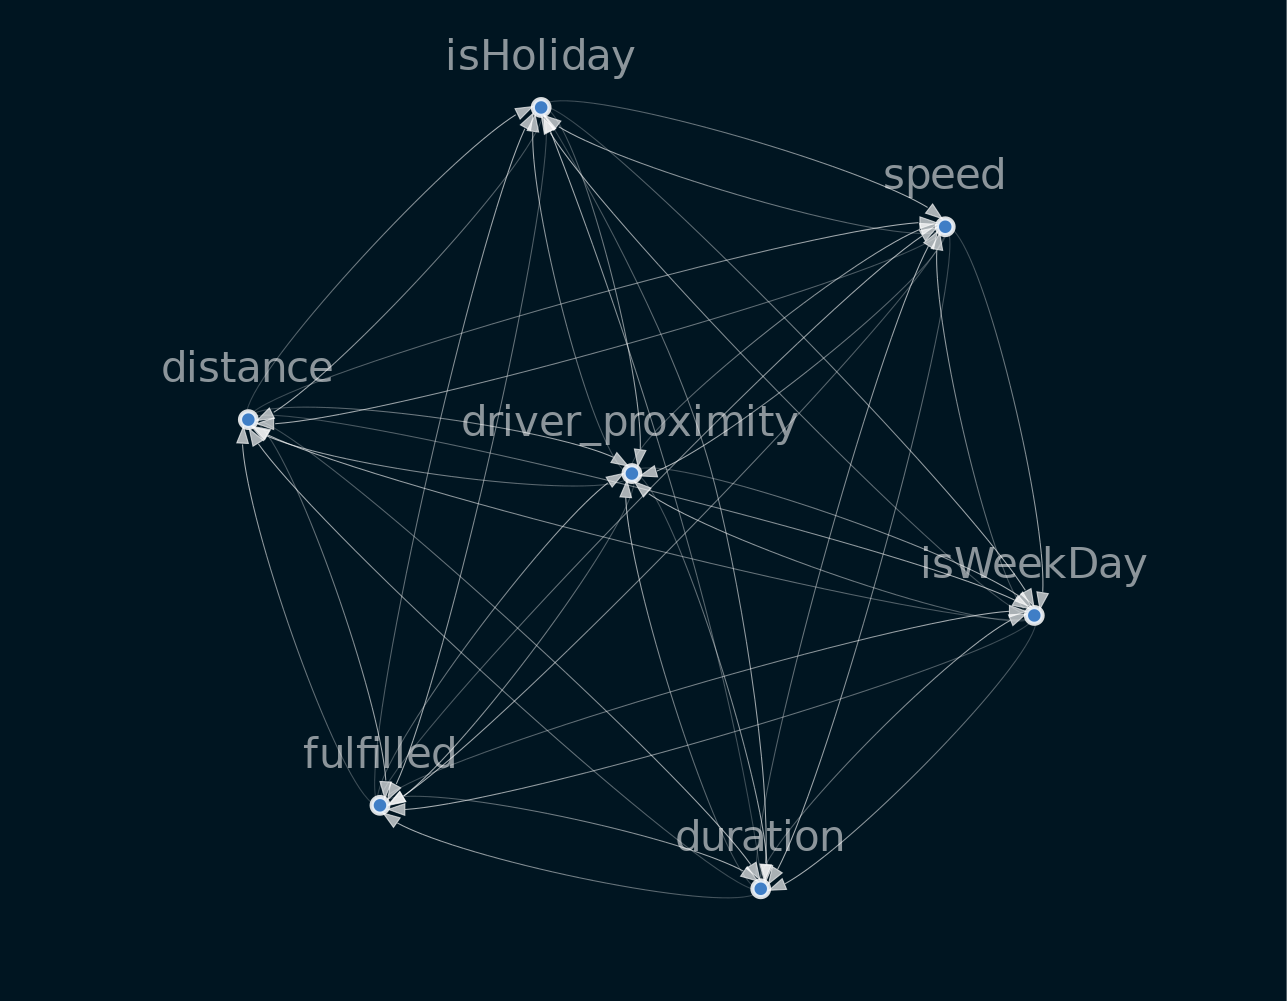

In [57]:
from IPython.display import Image
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE

viz = plot_structure(
    sm,
    graph_attributes={"scale": "2"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
    
)
Image(viz.draw(format='png'))

# The graph shows all of the features connected

### Remove Edges below certain threshold to identify the important causal features

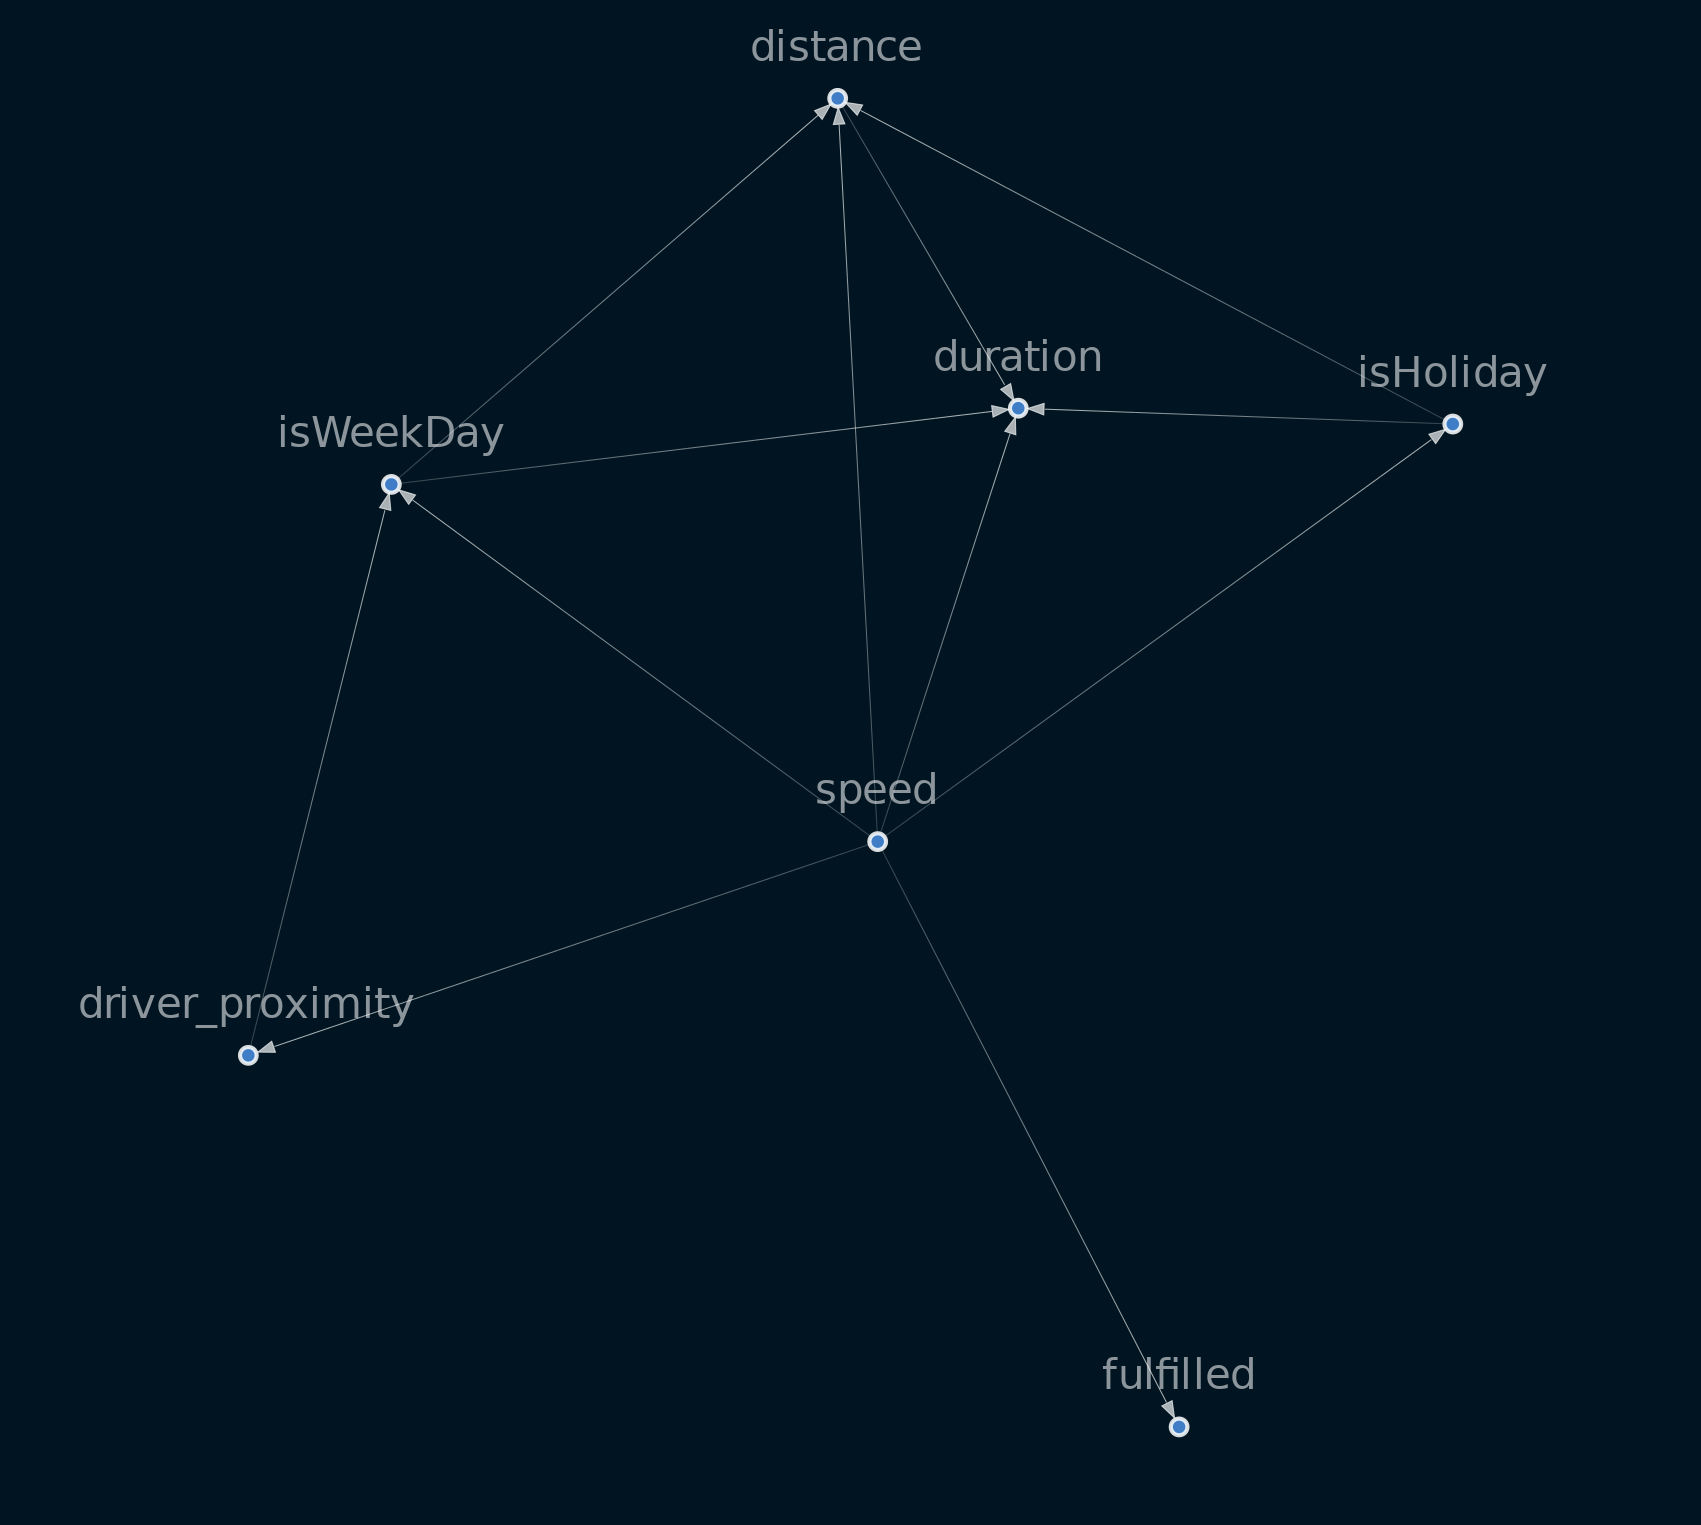

In [58]:
sm.remove_edges_below_threshold(0.8)
viz = plot_structure(
    sm,
    graph_attributes={"scale": "2"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
)
Image(viz.draw(format='png'))

From the above DAG, we can see many correct and incorrect relations. 

For Example
- Correct Relations
  - speed `=>` duration
  - driver_proximity `=>` duration
  - driver_proximity `=>` fulfilled
  - isHoliday `=>` isWeekDay
- Incorrect Relations
  - speed `=>` isHoliday
  - speed `=>` distance
  - fulfilled `=>`isWeekday and etc,.


* With more runs the graph has been updated

### Rerun the structure learning with some added constraints to avoid erroneous relationships

In [59]:
sm = from_pandas(df_causal_norm, tabu_edges=[("speed", "isHoliday"),("speed","distance"),("fulfilled","isWeekDay")], w_threshold=0.8)


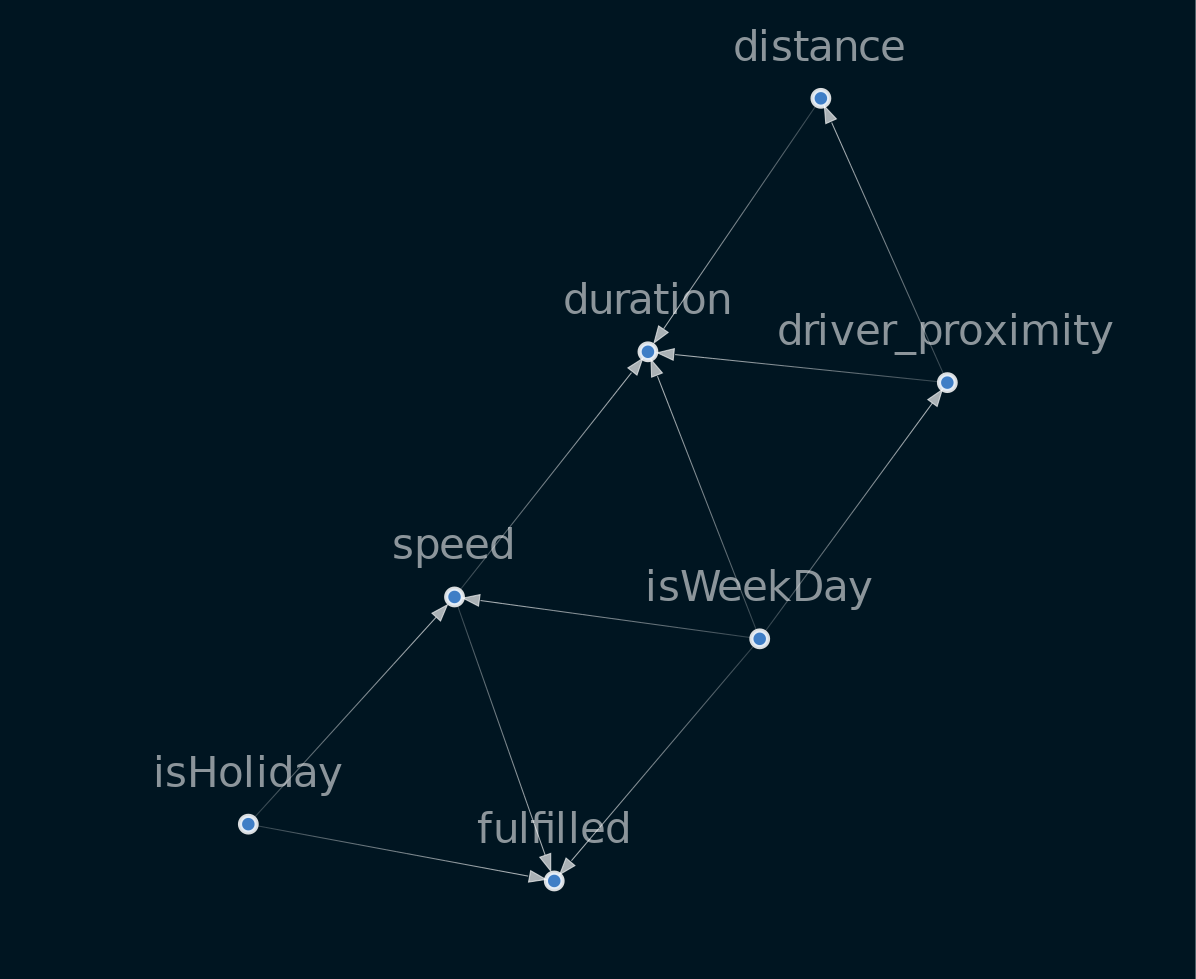

In [81]:
viz = plot_structure(
    sm,
    graph_attributes={"scale": "1"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
)
Image(viz.draw(format='png'))

In [80]:
# logical modifications 
sm.add_edge("isWeekDay", "speed")
sm.remove_edge("speed", "isWeekDay")
sm.add_edge("driver_proximity","distance")
sm.add_edge("distance","duration")

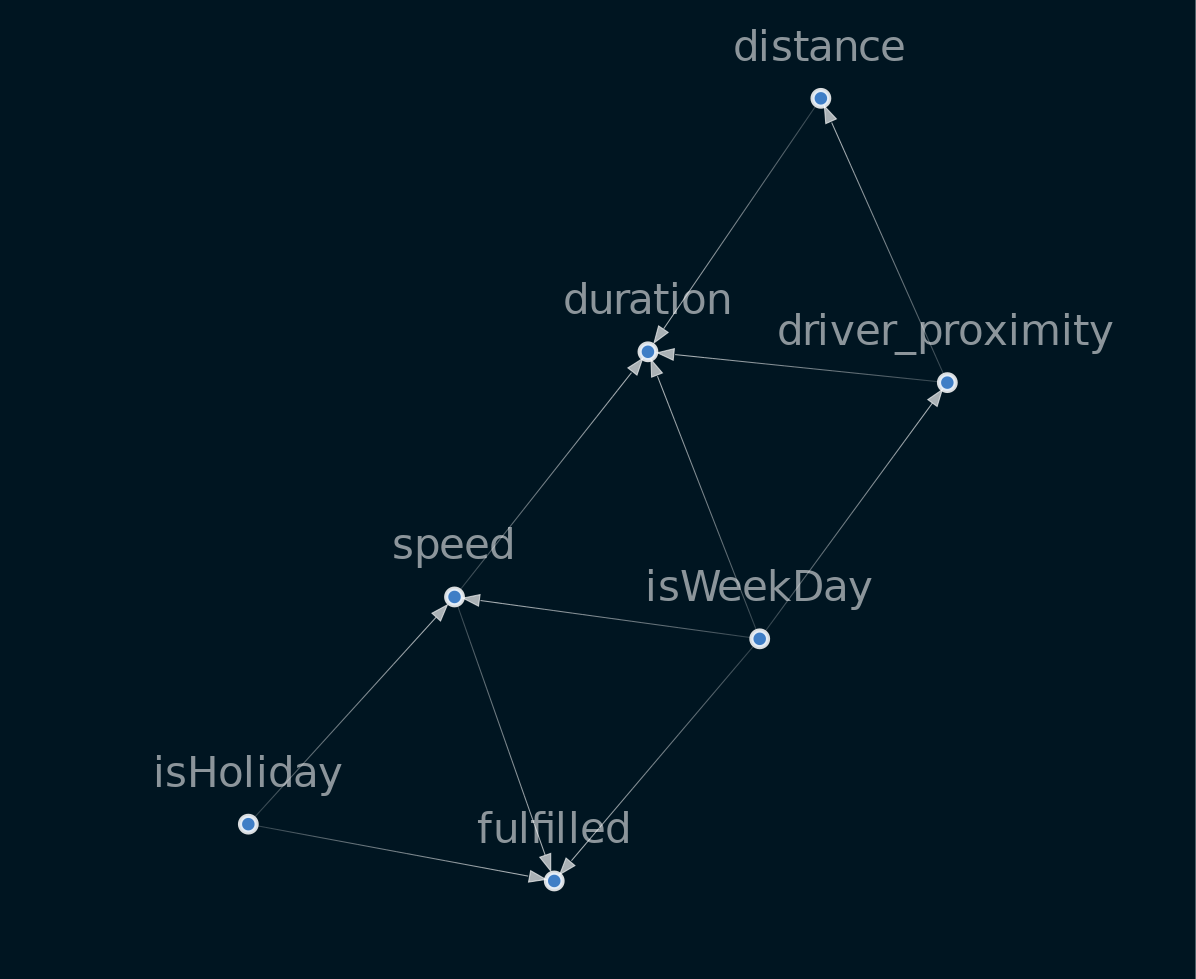

In [82]:
viz = plot_structure(
    sm,
    graph_attributes={"scale": "1"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
)
Image(viz.draw(format='png'))

### Exporting structure


In [83]:
import networkx as nx

nx.drawing.nx_pydot.write_dot(sm, '../graphs/graph2.dot')

### Fitting the Conditional Distribution of the Bayesian Network

In [84]:
from causalnex.network import BayesianNetwork

bn = BayesianNetwork(sm)

## Preparing the Discretised Data

In [85]:
df_disc = df_causal.copy()

In [86]:
df_disc.columns

Index(['distance', 'isWeekDay', 'duration', 'isHoliday', 'speed',
       'driver_proximity', 'fulfilled'],
      dtype='object')

### reverse categorical features

In [87]:
df_disc['isWeekDay'] = df_disc['isWeekDay'].apply(lambda x: 'weekday' if x == 1 else 'weekend')
df_disc['isHoliday'] = df_disc['isHoliday'].apply(lambda x: 'holiday' if x == 1 else 'no-holiday')
df_disc['fulfilled'] = df_disc['fulfilled'].apply(lambda x: 'fulfilled' if x == 1 else 'unfulfilled')


In [88]:
df_disc.head(4)

,distance,isWeekDay,duration,isHoliday,speed,driver_proximity,fulfilled
0,21048.291786,weekday,217.0,no-holiday,96.996736,693.616345,fulfilled
1,8160.545042,weekday,2055.0,no-holiday,3.971068,1968.052120,fulfilled
2,5067.848407,weekday,3681.0,no-holiday,1.376759,2954.031519,fulfilled
3,5603.770382,weekday,2102.0,no-holiday,2.665923,1197.387881,fulfilled


### discretise

In [89]:
from causalnex.discretiser import Discretiser

<AxesSubplot:>

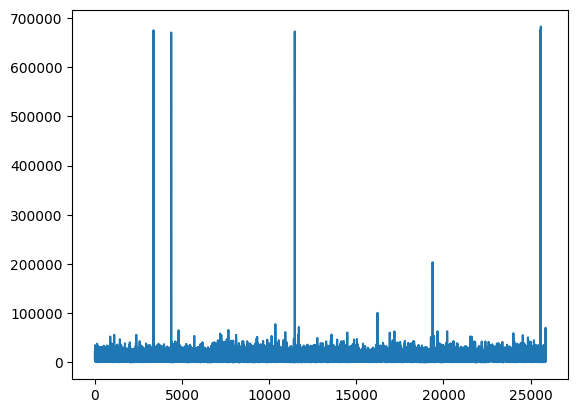

In [90]:
df_disc.distance.plot()

In [91]:
df_disc.describe()

,distance,duration,speed,driver_proximity
count,25871.000000,25871.000000,25871.000000,25871.000000
mean,11536.180757,3772.363109,13.412700,1593.513835
std,12136.372978,7115.513966,80.391011,4647.080656
min,16.471055,16.000000,0.005076,0.000000
25%,5369.247981,1668.000000,1.999265,821.627089
50%,9816.814170,2776.000000,3.226599,1414.880117
75%,15841.895164,4243.000000,5.123073,1934.607405
max,682878.368122,326248.000000,5153.210716,659052.705726


In [92]:
df_disc["distance"] = Discretiser(method="fixed", 
                                           numeric_split_points=[100,1000,5000,10000,20000]).transform(df_disc["distance"].values)
df_disc["distance"].value_counts()

4    9011
3    7307
2    5493
5    3682
1     376
0       2
Name: distance, dtype: int64

<AxesSubplot:>

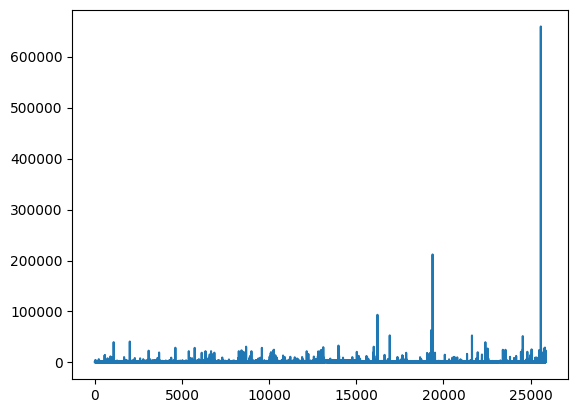

In [93]:
df_disc.driver_proximity.plot()

In [94]:
df_disc["driver_proximity"] = Discretiser(method="fixed",
        numeric_split_points=[100,1000,5000,10000,20000]).transform(df_disc["driver_proximity"].values)
df_disc["driver_proximity"].value_counts()

2    17188
1     7866
0      591
3       91
4       84
5       51
Name: driver_proximity, dtype: int64

In [95]:
df_disc["speed"] = Discretiser(method="fixed",
        numeric_split_points=[1,100]).transform(df_disc["speed"].values)
df_disc["speed"].value_counts()

1    23514
0     1789
2      568
Name: speed, dtype: int64

In [96]:
df_disc["duration"] = Discretiser(method="fixed",
        numeric_split_points=[60,3600,7200]).transform(df_disc["duration"].values)
df_disc["duration"].value_counts()

1    16706
2     7061
3     1790
0      314
Name: duration, dtype: int64

### Creating Labels for the Numerical Features

In [97]:
distance = {0: "short", 1: "1km", 2: "5km",
            3: "10km", 4: "20km",  5: "long",
            }
driver_proximity = {0: "short", 1: "1km", 2: "5km",
            3: "10km", 4: "20km",  5: "long",
            }
duration = {0: "1min", 1: "1hr", 2: "2hr", 3: "above-2hr"}


speed = {
    0: "slow",
    1: "medium",
    2: "fast"
}

In [98]:

df_disc["distance"] = df_disc["distance"].map(distance)
df_disc["driver_proximity"] = df_disc["driver_proximity"].map(driver_proximity)
df_disc["speed"] = df_disc["speed"].map(speed)
df_disc["duration"] = df_disc["duration"].map(duration)

In [99]:
df_disc

,distance,isWeekDay,duration,isHoliday,speed,driver_proximity,fulfilled
0,long,weekday,1hr,no-holiday,medium,1km,fulfilled
1,10km,weekday,1hr,no-holiday,medium,5km,fulfilled
2,10km,weekday,2hr,no-holiday,medium,5km,fulfilled
3,10km,weekday,1hr,no-holiday,medium,5km,fulfilled
4,20km,weekday,1hr,no-holiday,medium,1km,fulfilled
...,...,...,...,...,...,...,...
25866,5km,weekday,1hr,no-holiday,medium,5km,fulfilled
25867,5km,weekend,1hr,holiday,medium,5km,fulfilled
25868,long,weekend,1hr,holiday,medium,5km,fulfilled
25869,20km,weekday,2hr,no-holiday,medium,5km,fulfilled


# split the data into train/test set

In [100]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_disc, train_size=0.9, test_size=0.1, random_state=7)

### Model Probability
With the learnt structure model from earlier and the discretised data, we can now fit the probability distrbution of the Bayesian Network. The first step in this is specifying all of the states that each node can take. This can be done either from data, or providing a dictionary of node values. We use the full dataset here to avoid cases where states in our test set do not exist in the training set. For real-world applications, these states may need to be provided using the dictionary method.

In [101]:
bn = bn.fit_node_states(df_disc)

### fit Conditional Probability Distributions
The fit_cpds method of BayesianNetwork accepts a dataset to learn the conditional probablilty distributions (CPDs) of each node, along with a method of how to do this fit.

In [160]:

bn = bn.fit_cpds(train, method="BayesianEstimator", bayes_prior="K2")

In [161]:
bn.cpds["fulfilled"]

isHoliday   holiday                                           no-holiday  \
isWeekDay   weekday               weekend                        weekday   
speed          fast medium slow      fast    medium      slow       fast   
fulfilled                                                                  
fulfilled       0.5    0.5  0.5  0.082353  0.988072  0.804781   0.115741   
unfulfilled     0.5    0.5  0.5  0.917647  0.011928  0.195219   0.884259   

isHoliday                                            
isWeekDay                       weekend              
speed          medium      slow    fast medium slow  
fulfilled                                            
fulfilled    0.989532  0.909492     0.5    0.5  0.5  
unfulfilled  0.010468  0.090508     0.5    0.5  0.5

### Predict the State from the input Data

- The predict method of BayesianNetwork allows us to make predictions based on the data using the learnt Bayesian Network. For example, we want to predict if a trip is fulfilled or not based on the input data. Imagine we have a trip data that looks like this:

In [162]:
predictions = bn.predict(df_disc, "fulfilled")

In [163]:
# sample data
df_disc.loc[495]

distance                   20km
isWeekDay               weekday
duration                    1hr
isHoliday            no-holiday
speed                      fast
driver_proximity            1km
fulfilled           unfulfilled
Name: 495, dtype: object

In [164]:

print(f"The prediction is '{predictions.loc[495, 'fulfilled_prediction']}'")

The prediction is 'unfulfilled'


## Evaluate Models performance

### Classification Report
To obtain a classification report using a BN, we need to provide a test set, and the node we are trying to classify. The report will predict the target node for all rows in the test set, and evaluate how well those predictions are made.

In [138]:
from causalnex.evaluation import classification_report

classification_report(bn, test, "fulfilled")

{'fulfilled_fulfilled': {'precision': 0.983024082116068,
  'recall': 0.9983961507618284,
  'f1-score': 0.9906504873682116,
  'support': 2494},
 'fulfilled_unfulfilled': {'precision': 0.9272727272727272,
  'recall': 0.5425531914893617,
  'f1-score': 0.6845637583892618,
  'support': 94},
 'accuracy': 0.981839258114374,
 'macro avg': {'precision': 0.9551484046943977,
  'recall': 0.770474671125595,
  'f1-score': 0.8376071228787367,
  'support': 2588},
 'weighted avg': {'precision': 0.9809991101859001,
  'recall': 0.981839258114374,
  'f1-score': 0.9795329632090071,
  'support': 2588}}

### Area Under the Curve
Receiver Operating Characteristics (ROC), and the Area Under the ROC Curve (AUC) can be obtained using the roc_auc method within the CausalNex metrics module. Again, a test set and target node must be provided. The ROC curve is computed by micro-averaging predictions made across all states (classes) of the target node.

In [141]:

from causalnex.evaluation import roc_auc
roc, auc = roc_auc(bn, test, "fulfilled")
print(auc)

###
# We have a high area under the curve, so along with the high f1 and recall scores
# we can conclude the model is not overfitting but performing good.

0.9876026912942627


### Querying Marginals
After iterating over our model structure, CPDs, and validating our model quality, we can query our model under different observations to gain insights.

### Baseline Marginals
To query the model for baseline marginals that reflect the population as a whole, a query method can be used. First let’s update our model using the complete dataset, since the one we currently have was only built from training data.

In [167]:
# For inference, we must create a new InferenceEngine from our BayesianNetwork, which lets us query the model. 
# The query method will compute the marginal likelihood of all states for all nodes.

from causalnex.inference import InferenceEngine

ie = InferenceEngine(bn)
marginals = ie.query()
marginals["fulfilled"]


{'fulfilled': 0.8503444039244202, 'unfulfilled': 0.14965559607557932}

The output observed tells us that P(fulfilled=fulfilled) = 0.84, and the P(fulfilled=Not-fulfilled) = 0.15.

### Marginals after Observations
We can also query the marginal likelihood of states in our network given some observations. These observations can be made anywhere in the network, and their impact will be propagated through to the node of interest.
#### Likelihood of **is_fulfilled** based on **distance**

In [170]:
distance

{0: 'short', 1: '1km', 2: '5km', 3: '10km', 4: '20km', 5: 'long'}

In [171]:
marginals_short = ie.query({"distance": "short"})
marginals_1km = ie.query({"distance": "1km"})
marginals_5km = ie.query({"distance": "5km"})
marginals_10km = ie.query({"distance": "10km"})
marginals_20km = ie.query({"distance": "20km"})
marginals_long = ie.query({"distance": "long"})

print("Marginal fulfilled | Short Distance", marginals_short["fulfilled"])
print("Marginal fulfilled | Medium Distance", marginals_1km["fulfilled"])
print("Marginal fulfilled | Medium Distance", marginals_5km["fulfilled"])
print("Marginal fulfilled | Medium Distance", marginals_10km["fulfilled"])
print("Marginal fulfilled | Medium Distance", marginals_20km["fulfilled"])
print("Marginal fulfilled | Long Distance", marginals_long["fulfilled"])

Marginal fulfilled | Short Distance {'fulfilled': 0.8467656285818369, 'unfulfilled': 0.15323437141816304}
Marginal fulfilled | Medium Distance {'fulfilled': 0.849988874343162, 'unfulfilled': 0.15001112565683808}
Marginal fulfilled | Medium Distance {'fulfilled': 0.850183256472108, 'unfulfilled': 0.14981674352789198}
Marginal fulfilled | Medium Distance {'fulfilled': 0.8503157702187429, 'unfulfilled': 0.149684229781257}
Marginal fulfilled | Medium Distance {'fulfilled': 0.8504747769655918, 'unfulfilled': 0.1495252230344082}
Marginal fulfilled | Long Distance {'fulfilled': 0.8503679956019424, 'unfulfilled': 0.1496320043980575}


## ML Models Development

### Prepare The Data

In [174]:
X = df_causal_norm.drop(columns=['fulfilled'], axis=1)
y = df_causal_norm['fulfilled']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123)

In [178]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((20696, 6), (20696,), (5175, 6), (5175,))

### Logistic Regression

In [181]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

lr = LogisticRegression()

In [183]:
scoring = ['accuracy', 'precision', 'recall', 'f1']
coef = []

In [189]:
lr_results = cross_validate(estimator=lr,
    X=X,
    y=y,
    cv=5,
    scoring=scoring,
    return_train_score=True, return_estimator=True)

In [191]:
lr_results

{'fit_time': array([0.12887239, 0.08909869, 0.06891704, 0.08645964, 0.09231162]),
 'score_time': array([0.01394653, 0.00929594, 0.00936699, 0.00966907, 0.01007175]),
 'estimator': [LogisticRegression(),
  LogisticRegression(),
  LogisticRegression(),
  LogisticRegression(),
  LogisticRegression()],
 'test_accuracy': array([0.96425121, 0.9686896 , 0.96540394, 0.96231156, 0.96385775]),
 'train_accuracy': array([0.96545226, 0.96443929, 0.9653573 , 0.96588878, 0.96526067]),
 'test_precision': array([0.96547711, 0.97035303, 0.96750973, 0.96667966, 0.9669132 ]),
 'train_precision': array([0.96778432, 0.96656948, 0.96764463, 0.96788946, 0.96750499]),
 'test_recall': array([0.99859579, 0.99799398, 0.99759278, 0.99518556, 0.99658977]),
 'train_recall': array([0.99734203, 0.99759278, 0.99739218, 0.99769308, 0.99744233]),
 'test_f1': array([0.98175722, 0.98397943, 0.98232099, 0.98072551, 0.98152722]),
 'train_f1': array([0.98234088, 0.98183613, 0.98229324, 0.98256532, 0.9822456 ])}

- The model is overfitting.
  

### Decision Tree Classifier

In [195]:
from sklearn.tree import DecisionTreeClassifier

In [196]:
dt = DecisionTreeClassifier()

In [198]:
dt_results = cross_validate(estimator=dt,
    X=X,
    y=y,
    cv=5,
    scoring=scoring,
    return_train_score=True, return_estimator=True)

In [200]:
dt_results

{'fit_time': array([0.1304729 , 0.11876416, 0.10860968, 0.13865161, 0.10943031]),
 'score_time': array([0.01102781, 0.01001716, 0.01108074, 0.01134896, 0.00995922]),
 'estimator': [DecisionTreeClassifier(),
  DecisionTreeClassifier(),
  DecisionTreeClassifier(),
  DecisionTreeClassifier(),
  DecisionTreeClassifier()],
 'test_accuracy': array([0.99826087, 0.99826053, 0.99748744, 0.99729416, 0.99768071]),
 'train_accuracy': array([1., 1., 1., 1., 1.]),
 'test_precision': array([0.99899719, 0.99919743, 0.99819639, 0.99919663, 0.99839647]),
 'train_precision': array([1., 1., 1., 1., 1.]),
 'test_recall': array([0.99919759, 0.99899699, 0.99919759, 0.99799398, 0.99919759]),
 'train_recall': array([1., 1., 1., 1., 1.]),
 'test_f1': array([0.99909738, 0.9990972 , 0.99869674, 0.99859494, 0.99879687]),
 'train_f1': array([1., 1., 1., 1., 1.])}

- We still have An **Overfitting** problem with the DT Classifier

### Random Forest

In [205]:
from sklearn.ensemble import RandomForestClassifier

In [206]:
rf = RandomForestClassifier()


In [207]:
rf_results = cross_validate(estimator=rf,
    X=X,
    y=y,
    cv=5,
    scoring=scoring,
    return_train_score=True, return_estimator=True)

In [208]:
rf_results

{'fit_time': array([3.04029584, 3.30092096, 3.11404705, 3.1377573 , 3.03436422]),
 'score_time': array([0.06122613, 0.05662394, 0.05545545, 0.0543704 , 0.05569577]),
 'estimator': [RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier()],
 'test_accuracy': array([0.99864734, 0.99864708, 0.99845381, 0.99748744, 0.99864708]),
 'train_accuracy': array([1., 1., 1., 1., 1.]),
 'test_precision': array([0.99919775, 0.99939807, 0.99899739, 0.99959807, 0.99899759]),
 'train_precision': array([1., 1., 1., 1., 1.]),
 'test_recall': array([0.99939819, 0.99919759, 0.99939819, 0.99779338, 0.9995988 ]),
 'train_recall': array([1., 1., 1., 1., 1.]),
 'test_f1': array([0.99929796, 0.99929782, 0.99919775, 0.99869491, 0.9992981 ]),
 'train_f1': array([1., 1., 1., 1., 1.])}

### Save the Models and their results


In [217]:
from datetime import datetime
from pickle import dump 


'24-10-2022_10:53:01'

In [216]:
def generate_datetime_name() -> str:
    now = datetime.now()
    dt_string = now.strftime("%d-%m-%Y_%H:%M:%S")
    return dt_string

In [242]:
def save_results(res, name):
    name = "../results/" + name + "_results_" + generate_datetime_name() +".txt"
    try:
        with open(name, 'w') as f: 
            for key, value in res.items(): 
                f.write('%s:%s\n' % (key, value))
    except Exception as e:
        print('Error while producing result')

In [223]:
def save_model(model, name) -> None:
    file_name = "../models/" + name + "_" + generate_datetime_name() +'.pkl'
    
    try:
        with open(file_name, 'wb') as handle:
            dump(model, handle)
    except Exception as e:
        print('Error while producing model')

In [246]:
# save_model(dt,"DecitionTreeClassifier")
# save_results(rf_results,"RandomForest")

## Conclusion

All of the models are overfitting. So We can do the following in the future
- get more data to train them
  - In volume and also in feature type(by adding features that contain valuable information)
- Additional Feature Engineering with important features